# **Feature Engineering**

## Importing Libraries

In [2]:
# Basic Libraries for data manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# To remove warnings
import warnings
warnings.filterwarnings("ignore") 

## Load Dataset

In [3]:
df= pd.read_csv("cleaned_survey.csv")
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Feature Creation:
* Mental support
* Openness to discuss mental health issues
* Faced mental health issues before

In [4]:
# For creating Mental_support feature column; benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_vs_physical colmuns will be used
def mental_support(row):
    '''
    This function is to score the mental support given by company to the applicant
    '''
    score=0
    # benefits
    if row["benefits"]=='Yes':
        score+=1
    elif row["benefits"]=="Don't know":
        score+=0.5
    
    # care_options
    if row['care_options']=='Yes':
        score+=1
    elif row['care_options']=='Not sure':
        score=0.5
    
    # wellness_program
    if row["wellness_program"]=='Yes':
        score+=1
    elif row["wellness_program"]=="Don't know":
        score+=0.5

    # seek_help
    if row["seek_help"]=='Yes':
        score+=1
    elif row["seek_help"]=="Don't know":
        score+=0.5
    
    # anonymity
    if row["anonymity"]=='Yes':
        score+=1
    elif row["anonymity"]=="Don't know":
        score+=0.5
   
    # leave
    if row["leave"]=='Very easy':
        score+=2
    elif row['leave']=='Somewhat easy':
        score+=1.5
    elif row['leave']=="Don't know":
        score+=1
    elif row['leave']=='Somewhat difficult':
        score+=0.5
    
    # mental_vs_physical
    if row["mental_vs_physical"]=='Yes':
        score+=1
    elif row["mental_vs_physical"]=="Don't know":
        score+=0.5

    return score

In [5]:
df["mental_support"]=df.apply(mental_support,axis=1)
df.drop(['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave','mental_vs_physical'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,obs_consequence,mental_support
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,No,No,Some of them,Yes,No,Maybe,No,5.0
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Maybe,No,No,No,No,No,No,3.5
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,Yes,Yes,Yes,Yes,No,1.0
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,Yes,Yes,Some of them,No,Maybe,Maybe,Yes,1.5
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,No,No,Some of them,Yes,Yes,Yes,No,4.0


In [6]:
# For creating openness feature I will use; coworkers, supervisor, mental_health_interview

def openness(row):
    '''
    This function is score the openness og employees to discuus their mental problems 
    '''
    score=0
    # coworkers
    if row['coworkers']=='Yes':
        score+=1
    elif row['coworkers']=='Some of them':
        score+=0.5
    
    # supervisor
    if row['supervisor']=='Yes':
        score+=1
    elif row['supervisor']=='Some of them':
        score+=0.5

    # mental_health_interview
    if row['mental_health_interview']=='Yes':
        score+=1
    elif row['mental_health_interview']=='Maybe':
        score+=0.5
    
    return score

In [7]:
df["openness"]=df.apply(openness,axis=1)
df.drop(['coworkers','supervisor','mental_health_interview'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,mental_health_consequence,phys_health_consequence,phys_health_interview,obs_consequence,mental_support,openness
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,No,No,Maybe,No,5.0,1.5
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Maybe,No,No,No,3.5,0.0
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,Yes,No,1.0,3.0
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,Yes,Yes,Maybe,Yes,1.5,1.0
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,No,No,Yes,No,4.0,2.5


In [8]:
# For creating experience feature I will use; family_history, work_interfere, mental_health_consequence, obs_consequences, treatment columns

def experience(row):
    '''
    This is the function to score the past experience an employee has on the basis of mental heath consequences
    '''
    score=0

    # family history
    if row['family_history']=='Yes':
        score+=1

    # work_interfere
    if row['work_interfere']=='Often':
        score+=1.5
    elif row['work_interfere']=='Rarely':
        score+=1
    elif row['work_interfere']=='Sometimes':
        score+=0.5
    
    # mental_health_consequence
    if row['mental_health_consequence']=='Yes':
        score+=1
    elif row['mental_health_consequence']=='Maybe':
        score+=0.5

    # obs_consequence
    if row['obs_consequence']=='Yes':
        score+=1

    # treatment
    if row['treatment']=='Yes':
        score+=1
    
    return score

In [9]:
df["mental_exp"]=df.apply(experience,axis=1)
df.drop(['family_history','work_interfere','mental_health_consequence','obs_consequence'],axis=1,inplace=True)
df.head()

,Age,Gender,Country,self_employed,treatment,no_employees,remote_work,tech_company,phys_health_consequence,phys_health_interview,mental_support,openness,mental_exp
0,37,Female,United States,No,Yes,25,No,Yes,No,Maybe,5.0,1.5,2.5
1,44,Male,United States,No,No,1000,No,No,No,No,3.5,0.0,1.5
2,32,Male,Canada,No,No,25,No,Yes,No,Yes,1.0,3.0,1.0
3,31,Male,United Kingdom,No,Yes,100,No,Yes,Yes,Maybe,1.5,1.0,5.5
4,31,Male,United States,No,No,500,Yes,Yes,No,Yes,4.0,2.5,0.0


### Separating required columns for clustering analysis

In [10]:
X=df[['mental_support','openness','mental_exp']]
X.head()

,mental_support,openness,mental_exp
0,5.0,1.5,2.5
1,3.5,0.0,1.5
2,1.0,3.0,1.0
3,1.5,1.0,5.5
4,4.0,2.5,0.0


## Preprocessing: Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

## Making clusters and analysing them

In [12]:
# For dimensionality reduction for visualization
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=45,random_state=42)

X_reduced=tsne.fit_transform(X_scaled)

In [13]:
# Trying KMeans, Agglomerative Clustering and DBSCAN and analysing them to find best model for clustering
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

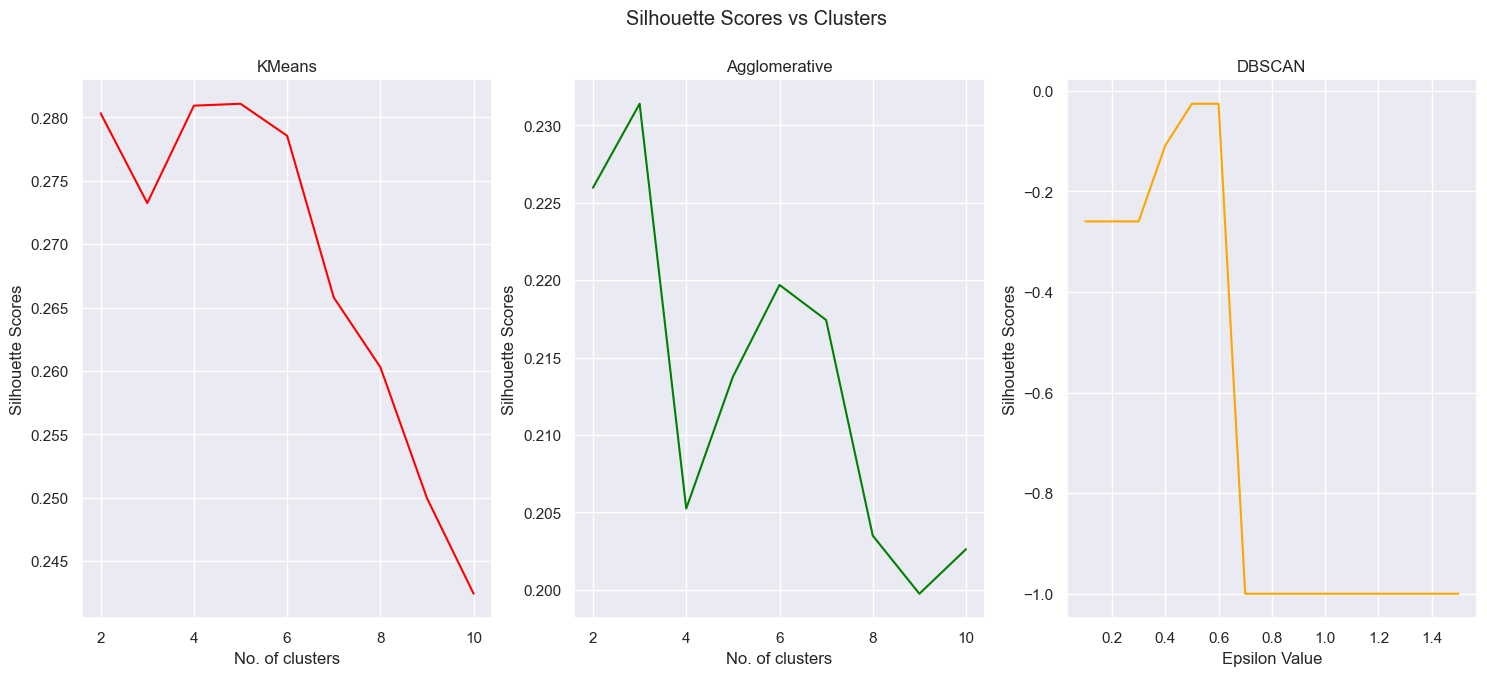

In [14]:
# Plotting silhouette scores to get best clusters

# KMeans Clustering
sil_score_kmean=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=42)
    label=model.fit_predict(X_scaled)
    sil=silhouette_score(X_scaled,label)
    sil_score_kmean.append(sil)

# Agglomerative Clustering
sil_score_agg=[]
for i in range(2,11):
    model=AgglomerativeClustering(n_clusters=i,linkage='ward')
    label=model.fit_predict(X_scaled)
    sil=silhouette_score(X_scaled,label)
    sil_score_agg.append(sil)

# DBSCAN Clustering
sil_score_dbscan=[]
range_=np.arange(0.1,1.6,0.1)
for i in range_:
    model=DBSCAN(eps=i,min_samples=5)
    label=model.fit_predict(X_scaled)

    # Skip silhouette scoring if only one label or noise
    unique_label=set(label)
    if len(unique_label - {-1}) >= 2:  # at least 2 clusters, ignoring noise
        sil = silhouette_score(X_scaled, label)
    else:
        sil = -1  # Invalid case
    sil_score_dbscan.append(sil)

# Plotting the graphs 
plt.figure(figsize=(18,7))
sns.set_theme(style="darkgrid")
plt.suptitle("Silhouette Scores vs Clusters")
plt.subplot(1,3,1)
sns.lineplot(x=range(2,11),y=sil_score_kmean,markers='o',color='red')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("KMeans")
plt.subplot(1,3,2)
sns.lineplot(x=range(2,11),y=sil_score_agg,markers='o',color='green')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("Agglomerative")
plt.subplot(1,3,3)
sns.lineplot(x=range_,y=sil_score_dbscan,markers='o',color='orange')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Scores')
plt.title("DBSCAN")

plt.show()

## Insights:
* K Means clustering scored highest silhouette score with 4 or 5 clusters.
* Agglomerative clustering also worked way better then DBSCAN with 3 clusters.
> **Result:** I will use K Means with 4 clusters for further analysis.

In [15]:
Kmeans_clustering=KMeans(n_clusters=4,random_state=42)
# Creating clusters
kmeans_labels=Kmeans_clustering.fit_predict(X_scaled)

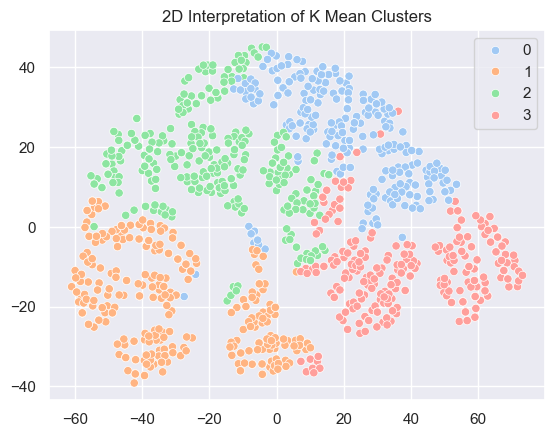

In [16]:
# 2d Visualisation of clusters
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=kmeans_labels,palette='pastel')
plt.title("2D Interpretation of K Mean Clusters")
plt.show()

#### Insights:
* Both clustering algorithms clearly revealed the data and formed well separated clusters in 2D interpretation.
* Kmeans clusters are more equal sizes and K Means forms clusters in shape of spherical clusters that can be visualized in 3D interpretation.
* Agglomerative cluster seems to capture irregular shapes, i.e. it is not constrained to form only sherical clusters and can capture any irregular pattern.

### Lets try to visualize it in 3D using plotly

In [17]:
import plotly.express as px

# Converting numpy array X_scaled back into dataframe with its original features
df_scaled = X
df_scaled['treatment']=df['treatment'].map({'No':0,'Yes':1})
df_scaled["Kmeans"]=kmeans_labels

# K Means Clustering Insights 

In [18]:
df_scaled.groupby('Kmeans')[["mental_support",'mental_exp','openness']].describe()

mental_support                                                 \
                count      mean       std  min  25%  50%    75%  max   
Kmeans                                                                 
0               261.0  6.114943  1.034132  4.0  5.5  6.0  7.000  8.0   
1               359.0  2.931755  1.121872  0.0  2.0  3.0  3.500  6.0   
2               326.0  2.987730  1.229698  0.0  2.0  3.0  3.875  6.0   
3               306.0  3.416667  1.024495  0.5  2.5  3.5  4.000  6.0   

       mental_exp                                              openness  \
            count      mean       std  min  25%  50%  75%  max    count   
Kmeans                                                                    
0           261.0  2.243295  1.049360  0.0  1.5  2.5  3.0  5.5    261.0   
1           359.0  1.501393  0.666956  0.0  1.0  1.5  2.0  2.5    359.0   
2           326.0  3.613497  0.696807  2.5  3.0  3.5  4.0  5.5    326.0   
3           306.0  0.887255  0.740758  0.0  0.5  0.5  1.5  3.0    306.0   

                                                     
            mean       std  min  25%  50%  75%  max  
Kmeans                                               
0       1.574713  0.637884  0.0  1.0  1.5  2.0  3.0  
1       0.477716  0.401887  0.0  0.0  0.5  1.0  1.5  
2       0.884969  0.649109  0.0  0.5  1.0  1.5  2.5  
3       1.857843  0.468923  1.0  1.5  2.0  2.0  3.0

In [19]:
pd.crosstab(df_scaled['Kmeans'],df_scaled['treatment'])

treatment,0,1
Kmeans,,
0,77,184
1,266,93
2,28,298
3,249,57


### **Cluster-Wise Insights:**
1. **Cluster 0**:
* High mental health support with low to medium openness and experience with mental health issues.
* Majority has taken treatment that can be due to higher mental health support and moderate openness.
* Cluster 0 belongs to the people who seeks treatment and have required facilties but still they demands some effort to open up and share their mental health issues.

2. **Cluster 1:**
* Very low openness and experience indicating that they are unaware and they are provided with very few facities for mental health.
* Highest count of no treatment taken indicating that openness and support provided has strong influence, if they are not comfortable to tell their mental health issue and are not provided with any mental health support then wouldn't seek treatments.
* Cluster 1 belongs to those who are unaware or either ignorant toward mental health issues and don't seeks treatment because they are not provided with facilities and support.

3. **Cluster 2:**
* High experience with mental health issues thus aware about its consequences, moderate openness and low mental health support.
* Highest treatment taken count suggests that having mental health experience is very influencial when it comes to seeking treatment.
* Cluster 2 belongs to those who are less open to discuss their mental health issues but are aware of the consequences and seek treatments.

4. **Cluster 3:**
* High openess to discuss there mental health issues but has low mental health support and experience.
* Majority hasn't taken any treatment, suggests that high openness has less positive influence on people seeking treatments.
* Cluster 3 belongs to people who aren't aware of mental health issues and aren't provided with facilities regarding their mental health.

### **Summary of Findings:**
> * Mental health experience is the most significant factor influencing whether someone seeks treatment.
> * Low openness reduces the likelihood of treatment, while high openness alone does not guarantee action.
> * Mental health support encourages treatment but isn’t a deciding factor in its absence — awareness can still drive people to seek help even without external support.

### **Tags for each cluster:**
 * **Cluster 0** – "Well-Supported but Private Individuals"
>*Why?*  Have resources and facities but they are not open to talk discuss their problems.
 * **Cluster 1** – "Isolated and Inexperienced Individuals"
>*Why?*  They don't seek treatment and aren't comfortable in sharing their problems.
 * **Cluster 2** – "Aware and Treatment-Seeking Individuals"
>*Why?*  Has personal experience of mental health issues and seek treatment when required.
 * **Cluster 3** – "Open but Unsupported Individuals"
>*Why?*  They are open to discuss their mental health issues but they don't have facilities and are unaware about the consequences of mental health issues.

## **Recommendations:**
* **Cluster 0:**  Assign specific supervisors or mental health counselors for individualized, session-based meetings. Build trust through expressive dialogue and tailor support to increase treatment adherence.
* **Cluster 1:** Launch immediate ad campaigns and interactive sessions to promote recognition and early detection of mental health issues. Implement self-service aide mechanisms like confidential evaluations and automated guided therapy to allow self-direction to care.
* **Cluster 2:** Improve mental health service delivery by including optional individual counseling and peer counseling. This group shows a high degree of awareness and self-initiative. We may leverage them to act as mental health agents of change.
* **Cluster 3:** Implement proactive mental wellness and awareness workshops. This cohort can be cultivated as mental health peer mentors or champions to foster positive work or academic culture.

In [20]:
# Mapping the given tags to Clusters

df_scaled['Kmeans_tags']=df_scaled['Kmeans'].map({
                                                  0:"Well-Supported but Private Individuals",
                                                  1:"Isolated and Inexperienced Individuals",
                                                  2:"Aware and Treatment-Seeking Individuals",
                                                  3:"Open but Unsupported Individuals"
                                                  })

# 3D Visualization for better understand
fig_kmeans= px.scatter_3d(
    df_scaled,
    x='mental_support',
    y='openness',
    z='mental_exp',
    color='Kmeans_tags',
    hover_data='treatment',
    color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96', "#AB63FA"],
    category_orders={
    "Cluster Tags": [
        "Well-Supported but Private Individuals",
        "Isolated and Inexperienced Individuals",
        "Aware and Treatment-Seeking Individuals",
        "Open but Unsupported Individuals"
    ]
},
    title="3D KMeans Cluster Visualization",
    opacity=0.7,
)
fig_kmeans.update_traces(marker=dict(size=5))
fig_kmeans.show()

# Clustering Analysis of Tech Workers Only

This section focuses exclusively on individuals working in tech companies. We aim to segment these respondents into meaningful clusters based on their behavioral patterns and workplace experiences. By doing so, we can uncover key insights about mental health awareness, support accessibility, and treatment-seeking tendencies among different groups within the tech workforce.

In [21]:
# Reloading the dataset
df=pd.read_csv('cleaned_survey.csv')
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [22]:
# Filtering the workers in tech roles
tech_df=df[df['tech_company']=='Yes']
tech_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
2,32,Male,Canada,No,No,No,Rarely,25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,No,Yes,No,Sometimes,25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No


In [23]:
X_tech=pd.DataFrame()
X_tech['mental_support']=tech_df.apply(mental_support,axis=1)
X_tech["openness"]=tech_df.apply(openness,axis=1)
X_tech["mental_exp"]=tech_df.apply(experience,axis=1)
X_tech.head()

,mental_support,openness,mental_exp
0,5.0,1.5,2.5
2,1.0,3.0,1.0
3,1.5,1.0,5.5
4,4.0,2.5,0.0
5,3.0,2.0,1.5


## Preprocessing: Standard Scaler

In [24]:
scaler_tech=StandardScaler()
X_scaled_tech= scaler_tech.fit_transform(X_tech)

## Making clusters and analysing them

In [25]:
tsne_tech=TSNE(n_components=2,perplexity=45,random_state=42)

X_reduced_tech=tsne_tech.fit_transform(X_scaled_tech)

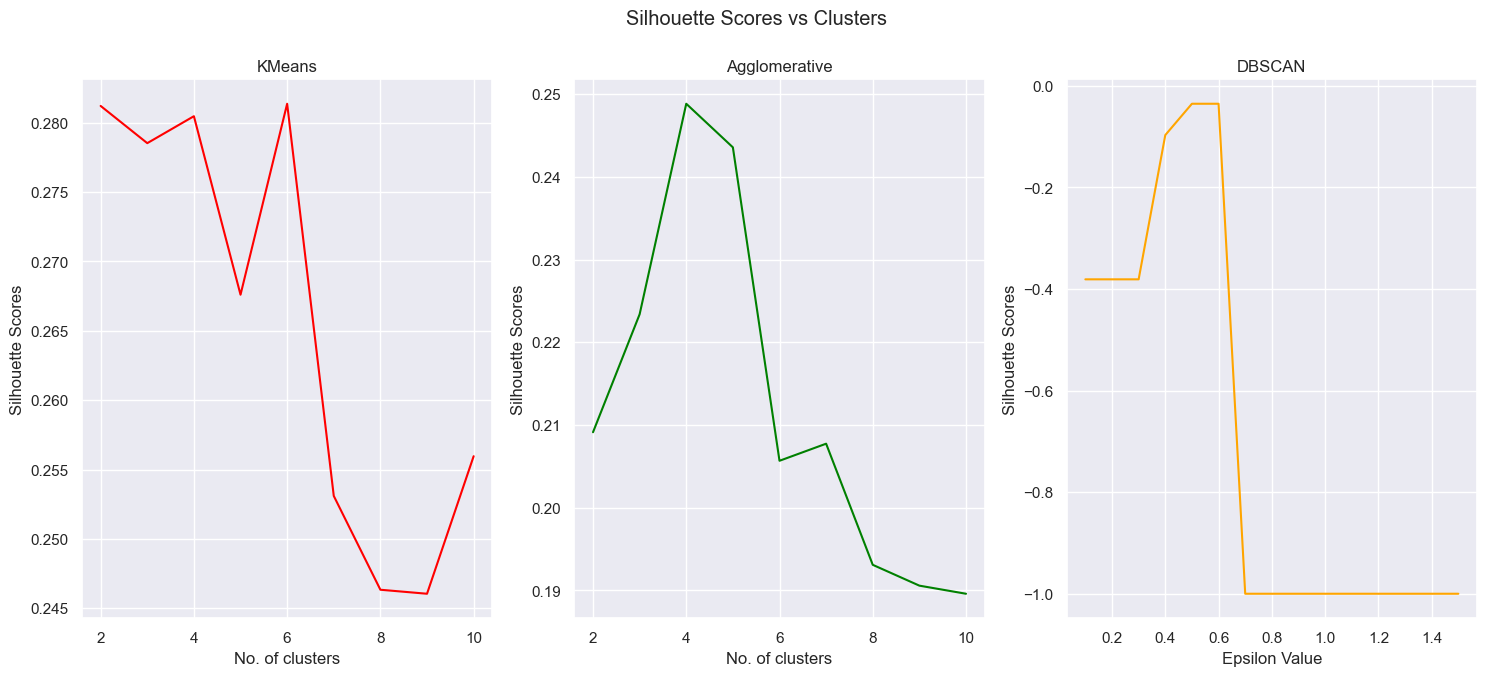

In [26]:
# Plotting silhouette scores to get best clusters

# KMeans Clustering
sil_score_kmean=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,random_state=42)
    label=model.fit_predict(X_scaled_tech)
    sil=silhouette_score(X_scaled_tech,label)
    sil_score_kmean.append(sil)

# Agglomerative Clustering
sil_score_agg=[]
for i in range(2,11):
    model=AgglomerativeClustering(n_clusters=i,linkage='ward')
    label=model.fit_predict(X_scaled_tech)
    sil=silhouette_score(X_scaled_tech,label)
    sil_score_agg.append(sil)

# DBSCAN Clustering
sil_score_dbscan=[]
range_=np.arange(0.1,1.6,0.1)
for i in range_:
    model=DBSCAN(eps=i,min_samples=5)
    label=model.fit_predict(X_scaled_tech)

    # Skip silhouette scoring if only one label or noise
    unique_label=set(label)
    if len(unique_label - {-1}) >= 2:  # at least 2 clusters, ignoring noise
        sil = silhouette_score(X_scaled_tech, label)
    else:
        sil = -1  # Invalid case
    sil_score_dbscan.append(sil)

# Plotting the graphs 
plt.figure(figsize=(18,7))
sns.set_theme(style="darkgrid")
plt.suptitle("Silhouette Scores vs Clusters")
plt.subplot(1,3,1)
sns.lineplot(x=range(2,11),y=sil_score_kmean,markers='o',color='red')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("KMeans")
plt.subplot(1,3,2)
sns.lineplot(x=range(2,11),y=sil_score_agg,markers='o',color='green')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title("Agglomerative")
plt.subplot(1,3,3)
sns.lineplot(x=range_,y=sil_score_dbscan,markers='o',color='orange')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Scores')
plt.title("DBSCAN")

plt.show()

### From above, I am considering KMeans Clustering with cluster 3 for clustering and analysis

In [27]:
# Kmeans cluster with 3 clusters
Kmeans_3_clustering=KMeans(n_clusters=3,random_state=42)
cluster_labels_3=Kmeans_3_clustering.fit_predict(X_scaled_tech)

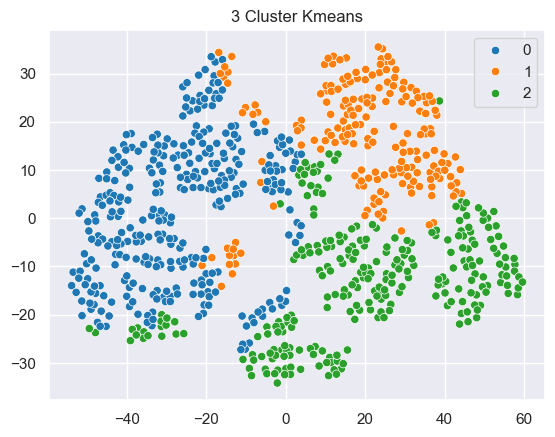

In [28]:
sns.set_theme(style='darkgrid')
sns.scatterplot(x=X_reduced_tech[:,0],y=X_reduced_tech[:,1],hue=cluster_labels_3,palette='tab10')
plt.title('3 Cluster Kmeans')
plt.show()

### KMeans Clustering of Tech Workers (t-SNE Reduced Features)
- **Left Plot (3 Clusters)**: This plot segments the data into three disparate behavioral or demographic clusters, which reveal higher level tendencies such as more likely providers, lonely persons, or adequately cared individuals. 

# KMeans Three Cluster Insights 

In [29]:
# Creating a dataframe for analysisng and deriving insights
X_kmeans=pd.DataFrame(X_tech)
X_kmeans['treatment']=tech_df['treatment']
X_kmeans['3 Cluster']=cluster_labels_3
X_kmeans.head()

,mental_support,openness,mental_exp,treatment,3 Cluster
0,5.0,1.5,2.5,Yes,1
2,1.0,3.0,1.0,No,2
3,1.5,1.0,5.5,Yes,0
4,4.0,2.5,0.0,No,2
5,3.0,2.0,1.5,No,2


In [30]:
X_kmeans.groupby(['3 Cluster'])[['mental_support','mental_exp','openness']].describe()

mental_support                                               \
                   count      mean       std  min  25%  50%  75%  max   
3 Cluster                                                               
0                  424.0  2.847877  1.170397  0.0  2.0  3.0  3.5  6.0   
1                  237.0  5.850211  1.161590  3.5  5.0  6.0  6.5  8.0   
2                  365.0  3.272603  1.006334  0.5  2.5  3.5  4.0  5.5   

          mental_exp                                              openness  \
               count      mean       std  min  25%  50%  75%  max    count   
3 Cluster                                                                    
0              424.0  2.745283  1.124087  0.5  2.0  2.5  3.5  5.5    424.0   
1              237.0  2.291139  1.068445  0.0  1.5  2.5  3.0  5.0    237.0   
2              365.0  0.931507  0.745477  0.0  0.5  1.0  1.5  3.5    365.0   

                                                        
               mean       std  min  25%  50%  75%  max  
3 Cluster                                               
0          0.567217  0.538877  0.0  0.0  0.5  1.0  2.5  
1          1.616034  0.651137  0.0  1.0  1.5  2.0  3.0  
2          1.606849  0.614238  0.0  1.0  1.5  2.0  3.0

In [31]:
pd.crosstab(X_kmeans['3 Cluster'],X_kmeans['treatment'])

treatment,No,Yes
3 Cluster,,
0,151,273
1,68,169
2,297,68


## Cluster Insights:
- **Cluster 0**: 
    * Getting low mental support and are less open in matter of discussing their mental health issue, but have high experience in mental health.
    * Majority has taken treatment but still a large no. of employees are not taking any treatment.
    * They are not provided mental health benefits from their organizations and are not open to discuss their problem but they have some mental experience that makes them to seek treatment.
    > They can be titled as 'Silent Sufferes'

- **Cluster 1**:
    * Getting high mental support then other clusters and are knowledgeable about consequences about mental health issue and are open to discuss their mental health issue.
    * Highest number of people with treatment taken and the people who didnt took any treatment possibly are not facing any mental issue and are ready to seek treatment if they needed.
    * They are the lucky people who are getting full support from their organization and also are knowledgeable and open to discuss about there mental health issues, they are good on there own and has a very low risk of facing mental health issues.
    > They can be titled as 'Well-Supported and Aware'

- **Cluster 2**:
    * Getting moderate mental support, have less experience in mental health and are open to discuss their mental health issues.
    * Having the highest count of people not taking treatment , possible reason can be that the people are not actually experinecing any mental health issue but they are also do not know about about consequences about mental health problem.
    * They are the people with highest risk of suffering any mental health issue.
    > They can be titled as 'Ignorant Sufferers'  

## Insight Summary:
- Openness may benefit tech workers but not harm them; that is, even if someone is uncomfortable discussing a mental health issue, they will seek treatment when necessary if they receive the necessary mental support and are aware of the potential consequences.
- Tech professionals' experiences with mental health have the biggest influence on their decision to seek treatment or not.
- Companies' mental health support is particularly beneficial since it allows employees to open up and talk about their problems, ensures their long-term mental health, and affects their performance and commitment to the firm.

## Suggestions:
* *Cluster 0 :* 
    * They requires supervisors and counsellors to facilitate open discussions about mental health issues. 
    * Companies should offer them with the necessary resources and facilities for their mental health, and this will result in a significant increase in their performance.
* *Cluster 1:*
    * They are good on their own and can serve as mental health ambassadors to educate their colleagues on the importance of mental health and its implications.
    * It would help to create a healthy work atmosphere among company members because workers may simply disclose their mental health issues with their coworkers.
    * It don't only help in improving the mental health of employees but also create a culture of healthy friendships among people and create a workplace where everyone are a part of family and comfortable with one another.
* *Cluster 2:*
    * Urgent need for counsellors and initiatives to raise awareness about mental health consequences. 
    * The company should offer comprehensive mental health support. 
    * Even if facilities are not available, they should be aware of the potential mental health repercussions and address any issues that arise. 
    * They must inform them about the symptoms of mental health concerns.



In [32]:
# Mapping the given tags to Clusters

X_kmeans['Kmeans_tags']=X_kmeans['3 Cluster'].map({
                                                  0:'Silent Sufferes',
                                                  1:'Well-Supported and Aware',
                                                  2:'Ignorant Sufferers',
                                                  })

# 3D Visualization for better understand
fig_kmeans= px.scatter_3d(
    X_kmeans,
    x='mental_support',
    y='openness',
    z='mental_exp',
    color='Kmeans_tags',
    hover_data='treatment',
    color_discrete_sequence=['#636EFA', '#EF553B', '#00CC96'],
    title="3D KMeans Cluster Visualization",
    opacity=0.7,
)
fig_kmeans.update_traces(marker=dict(size=5))
fig_kmeans.show()

# Saving the Final Model on hard disk

In [33]:
# Creating a pipeline 

from sklearn.pipeline import Pipeline

pipeline= Pipeline([('scaler',scaler),
                    ('Kmeans',Kmeans_clustering)])

tech_pipeline=Pipeline([('scaler',scaler_tech),
                        ('Kmeans',Kmeans_3_clustering)
])

# Saving the pipeline as .pkl file
import joblib

joblib.dump(pipeline,"KMeans_clustering.pkl")
joblib.dump(tech_pipeline,"Tech_only_cluster.pkl")

['Tech_only_cluster.pkl']